In [58]:
import tarfile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

easy_ham = []
hard_ham = []
spam = []

with tarfile.open("20021010_spam.tar.bz2", "r:bz2") as tar:
    for tarinfo in tar:
        if tarinfo.isreg():
            with tar.extractfile(tarinfo) as file_content:
                content_bytes = file_content.read()
                content_utf8 = content_bytes.decode('utf-8', errors='ignore')
            row = {'Name': tarinfo.name, 'Content': content_utf8, 'Type': 'Spam'}
            spam.append(row)

with tarfile.open("20021010_easy_ham.tar.bz2", "r:bz2") as tar:
    for tarinfo in tar:
        if tarinfo.isreg():
            with tar.extractfile(tarinfo) as file_content:
                content_bytes = file_content.read()
                content_utf8 = content_bytes.decode('utf-8', errors='ignore')
            row = {'Name': tarinfo.name, 'Content': content_utf8, 'Type': 'Ham'}
            easy_ham.append(row)

with tarfile.open("20021010_hard_ham.tar.bz2", "r:bz2") as tar:
    for tarinfo in tar:
        if tarinfo.isreg():
            with tar.extractfile(tarinfo) as file_content:
                content_bytes = file_content.read()
                content_utf8 = content_bytes.decode('utf-8', errors='ignore')
            row = {'Name': tarinfo.name, 'Content': content_utf8, 'Type': 'Ham'}
            hard_ham.append(row)

df_spam = pd.DataFrame(spam)
df_easy_ham = pd.DataFrame(easy_ham)
df_hard_ham = pd.DataFrame(hard_ham)

#Easy and Spam
df = pd.concat([df_spam, df_easy_ham], ignore_index=True)

def train_test(df):
    SEED = 1234
    df_train, df_test = train_test_split(df,random_state=SEED)
    return df_train, df_test

#df_test['Type'].value_counts()
train_test(df)

(                                                Name  \
 2076  easy_ham/0210.35f5f8aef973035bc4ec4ad13d717ebf   
 1748  easy_ham/1736.9ae2cf6f768fe1d218ddb61cea78e523   
 2547  easy_ham/0390.d1ecb44eef90f33245ee0835d94e80ad   
 1053  easy_ham/2272.9b8411be19d932252fc3a66478f556e4   
 1230  easy_ham/1108.128f9f0247b131505281874efc8e02f8   
 ...                                              ...   
 2041  easy_ham/2075.711e8f761dd164a7bcafc3ab23c96735   
 664   easy_ham/0739.88b6bb31404ad7f4802e4002d4e6ad66   
 1318  easy_ham/1212.b8a6ce9e2f0d2075ace38710d356c7af   
 723   easy_ham/0955.aeb04c1ac6bb728a6561da1da8b73995   
 2863  easy_ham/0767.da57f04c8030dce67142b9480e532b30   
 
                                                 Content Type  
 2076  From ilug-admin@linux.ie  Tue Oct  8 14:39:48 ...  Ham  
 1748  From neugens@libero.it  Fri Aug 23 11:06:09 20...  Ham  
 2547  From fork-admin@xent.com  Tue Aug 27 00:53:25 ...  Ham  
 1053  From rssfeeds@jmason.org  Tue Oct  1 10:38:02 ...  

In [33]:
df_train['Type'].value_counts()

Type
Ham     1924
Spam     365
Name: count, dtype: int64

In [34]:
cv = CountVectorizer()
X_train = cv.fit_transform(df_train['Content'])
X_test = cv.transform(df_test['Content'])

In [35]:
le = LabelEncoder()
y_train = le.fit_transform(df_train['Type'])
y_test = le.transform(df_test['Type'])

BernoulliNB Accuracy: 0.8964613368283093
BernoulliNB Precision: 0.8925501432664756
BernoulliNB Recall: 0.9936204146730463
BernoulliNB Confusion Matrix:


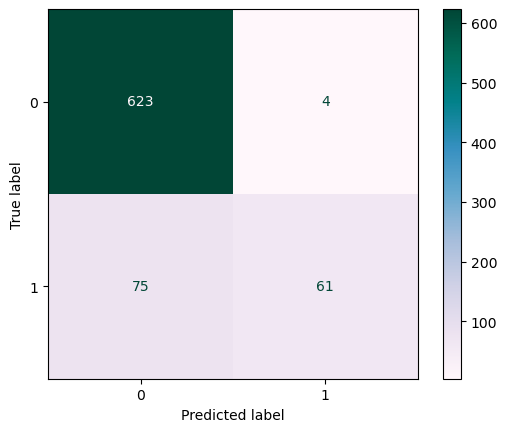

In [52]:
#Bernoulli

bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
acc_bnb = (y_test == y_pred_bnb).sum()/y_test.shape[0]

y_test_inv = le.inverse_transform(y_test)
y_pred_bnb_inv = le.inverse_transform(y_pred_bnb)
tp = ((y_test_inv == 'Ham') & (y_pred_bnb_inv == 'Ham')).sum()
fp = ((y_test_inv == 'Spam') & (y_pred_bnb_inv == 'Ham')).sum()
fn = ((y_test_inv == 'Ham') & (y_pred_bnb_inv == 'Spam')).sum()
tn = ((y_test_inv == 'Spam') & (y_pred_bnb_inv == 'Spam')).sum()
acc = (tp+tn)/(tp+fp+tn+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
acc, precision, recall

print("BernoulliNB Accuracy:", acc)
print("BernoulliNB Precision:", precision)
print("BernoulliNB Recall:", recall)

cm_bnb = metrics.confusion_matrix(y_test, y_pred_bnb)

print("BernoulliNB Confusion Matrix:")
cm_display = metrics.ConfusionMatrixDisplay(cm_bnb, display_labels = [0, 1])
#cm_display.plot()
cm_display.plot(cmap=plt.cm. PuBuGn)
plt.show()

MultinomialNB Accuracy, Precision, Recall (0.9659239842726082, 0.9601837672281777, 1.0)

MultinomialNB Confusion Matrix:


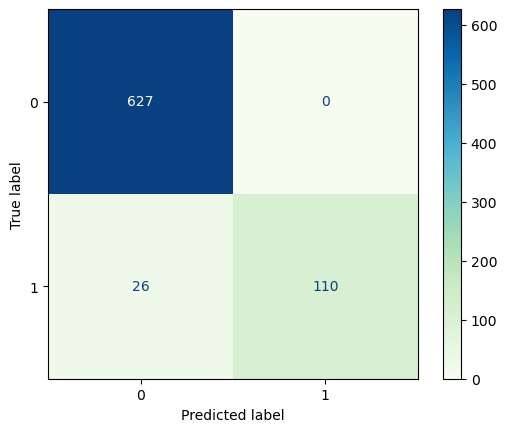

In [57]:
#Multinomial
def count_multinomialNB(X_train, y_train):
    mnb = MultinomialNB()
    mnb.fit(X_train,y_train)
    y_pred_mnb = mnb.predict(X_test)
    acc_mnb = (y_test == y_pred_mnb).sum()/len(y_test)
    
    y_test_inv = le.inverse_transform(y_test)
    y_pred_mnb_inv = le.inverse_transform(y_pred_mnb)
    tp = ((y_test_inv == 'Ham') & (y_pred_mnb_inv == 'Ham')).sum()
    fp = ((y_test_inv == 'Spam') & (y_pred_mnb_inv == 'Ham')).sum()
    fn = ((y_test_inv == 'Ham') & (y_pred_mnb_inv == 'Spam')).sum()
    tn = ((y_test_inv == 'Spam') & (y_pred_mnb_inv == 'Spam')).sum()
    acc = (tp+tn)/(tp+fp+tn+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    return acc, precision, recall
    
print("MultinomialNB Accuracy, Precision, Recall", count_multinomialNB(X_train, y_train))
#print("MultinomialNB Precision:", precision)
#print("MultinomialNB Recall:", recall)

cm_mnb = confusion_matrix(y_test, y_pred_mnb)
print("\nMultinomialNB Confusion Matrix:")
cm_display = metrics.ConfusionMatrixDisplay(cm_mnb, display_labels = [0, 1])
#cm_display.plot()
cm_display.plot(cmap=plt.cm.GnBu)
plt.show()